# Simple Spread Trading
### Riya Sheth

riyasheth@uchicago.edu

This uses the ETFs RYU and XLU

## 1. PREPARE DATA

### Imports

In [611]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import statistics
import statsmodels.api as sm
quandl.ApiConfig.api_key= "dSEK8-iUMxdiDUyrcPdc"
import warnings
from datetime import timedelta
from sklearn import preprocessing
warnings.filterwarnings('ignore')


### Fetch Data

In [613]:
start_date= pd.Timestamp('2020-12-02')
end_date= pd.Timestamp('2022-11-15')
ryu_dataframe= quandl.get_table('QUOTEMEDIA/PRICES', date = { 'gte': start_date, 'lte': end_date }, ticker='RYU')
xlu_dataframe= quandl.get_table('QUOTEMEDIA/PRICES', date = { 'gte': start_date, 'lte': end_date }, ticker='XLU')

Data: From the End of day US stock prices EOD databases.
ETFS RYU AND XLU are used

### Analyse Data

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,RYU,2022-11-15,112.92,113.2399,111.3551,112.510,66422.0,0.0,1.0,112.92,113.2399,111.3551,112.510,66422.0
1,RYU,2022-11-14,112.74,113.0400,111.4800,111.480,18378.0,0.0,1.0,112.74,113.0400,111.4800,111.480,18378.0
2,RYU,2022-11-11,114.23,114.2300,111.9400,112.740,15227.0,0.0,1.0,114.23,114.2300,111.9400,112.740,15227.0
3,RYU,2022-11-10,112.06,114.4000,110.8600,114.200,23557.0,0.0,1.0,112.06,114.4000,110.8600,114.200,23557.0
4,RYU,2022-11-09,109.65,110.3500,108.9101,108.977,13240.0,0.0,1.0,109.65,110.3500,108.9101,108.977,13240.0


,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.0,493.000000,493.000000,493.000000,493.000000,493.000000
mean,109.643840,110.315185,108.863856,109.588903,26141.730223,0.009528,1.0,107.847309,108.508312,107.077705,107.792298,26141.730223
std,7.565812,7.562015,7.413460,7.498170,28857.373313,0.079893,0.0,8.616771,8.635278,8.441586,8.546220,28857.373313
min,94.340000,94.910000,93.380000,93.390000,2148.000000,0.000000,1.0,90.832339,91.381146,89.908033,89.917661,2148.000000
25%,104.860000,105.670000,104.330000,104.726700,7725.000000,0.000000,1.0,102.836190,103.213096,102.139789,102.676443,7725.000000
50%,108.340000,109.120000,107.640000,108.220000,14225.000000,0.000000,1.0,106.657436,107.213778,105.834473,106.628164,14225.000000
75%,113.400000,114.390000,112.350000,113.400000,33976.000000,0.000000,1.0,112.920000,113.680000,112.020000,112.800000,33976.000000
max,127.010000,127.589300,126.215000,127.400000,204650.000000,0.790200,1.0,127.010000,127.589300,126.215000,127.400000,204650.000000


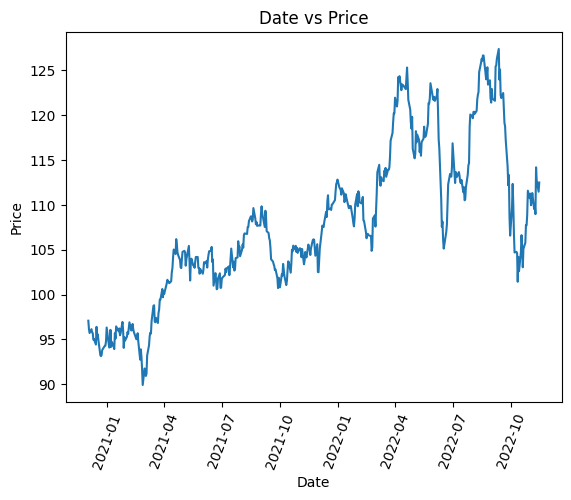

<Figure size 1000x1000 with 0 Axes>

In [617]:
display(ryu_dataframe.head())
display(ryu_dataframe.describe())
plt.plot(ryu_dataframe['date'], ryu_dataframe['adj_close'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Date vs Price')
plt.figure(figsize=(10, 10))
plt.show()

We can see that the price of ETF RYU share steadily increases over time with a few drawdowns.

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,XLU,2022-11-15,67.98,68.480,67.1900,68.01,13620758.0,0.0,1.0,67.98,68.480,67.1900,68.01,13620758.0
1,XLU,2022-11-14,68.12,68.490,67.2400,67.27,10245346.0,0.0,1.0,68.12,68.490,67.2400,67.27,10245346.0
2,XLU,2022-11-11,68.85,69.030,67.4339,68.08,15312009.0,0.0,1.0,68.85,69.030,67.4339,68.08,15312009.0
3,XLU,2022-11-10,67.73,68.975,66.7300,68.85,17915161.0,0.0,1.0,67.73,68.975,66.7300,68.85,17915161.0
4,XLU,2022-11-09,66.00,66.505,65.6200,65.75,12889903.0,0.0,1.0,66.00,66.505,65.6200,65.75,12889903.0


,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
count,493.000000,493.000000,493.000000,493.000000,4.930000e+02,493.000000,493.0,493.000000,493.000000,493.000000,493.000000,4.930000e+02
mean,67.722576,68.240480,67.173042,67.712333,1.402199e+07,0.008129,1.0,65.952807,66.457971,65.416313,65.942587,1.402199e+07
std,4.262100,4.274179,4.225047,4.272356,5.398152e+06,0.063442,0.0,4.989609,5.020996,4.929866,4.994356,5.398152e+06
min,58.810000,59.380000,58.270000,58.360000,3.636193e+06,0.000000,1.0,55.854400,56.395754,55.341539,55.427015,3.636193e+06
25%,64.620000,65.170000,64.215000,64.770000,1.000039e+07,0.000000,1.0,62.491330,62.864498,61.962245,62.488683,1.000039e+07
50%,67.100000,67.530000,66.591000,67.040000,1.288990e+07,0.000000,1.0,65.420783,65.834397,64.850931,65.352778,1.288990e+07
75%,70.390000,70.810000,69.625000,70.260000,1.699555e+07,0.000000,1.0,69.302321,69.872999,68.646309,69.214200,1.699555e+07
max,77.640000,78.220000,77.465000,78.120000,3.605015e+07,0.545600,1.0,77.124533,77.700682,76.950695,77.601346,3.605015e+07


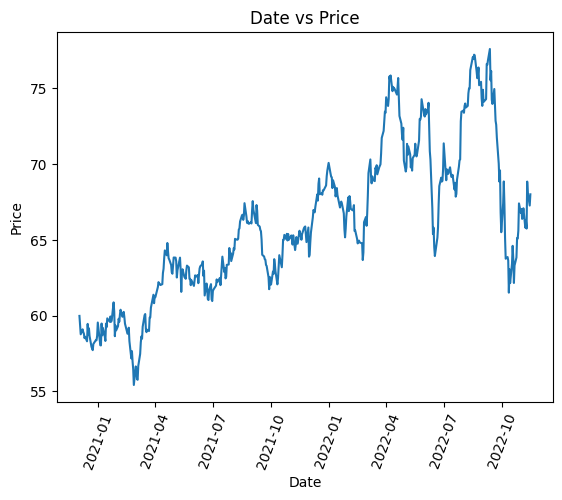

<Figure size 1000x1000 with 0 Axes>

In [618]:
display(xlu_dataframe.head())
display(xlu_dataframe.describe())
plt.plot(xlu_dataframe['date'], xlu_dataframe['adj_close'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Date vs Price')
plt.figure(figsize=(10, 10))
plt.show()

Similarly, the ETF share XLU steadily increase over time as well

In [620]:
correlation_df= pd.DataFrame()
correlation_df['Price of RYU']= ryu_dataframe['adj_close']
correlation_df['Price of XLU']= xlu_dataframe['adj_close']
corr_matrix = correlation_df.corr()
display(corr_matrix)

,Price of RYU,Price of XLU
Price of RYU,1.000000,0.992828
Price of XLU,0.992828,1.000000


These ETFs are very highly correlated. 

### Fetching FAMA-FRENCH Factors Data

In [444]:
filepath_rawdata = 'F-F_Research_Data_Factors_daily.csv'
rawdata = pd.read_csv(filepath_rawdata)

In [621]:
fff_data= rawdata[24875:25368]
fff_data= fff_data.set_index('Date')
display(fff_data.head())

,Mkt-RF,SMB,HML,RF
Date,,,,
20201202,0.11,-0.09,1.07,0.0
20201203,0.18,0.50,-0.09,0.0
20201204,1.02,1.47,0.84,0.0
20201207,0.03,0.24,-1.02,0.0
20201208,0.47,1.02,-0.71,0.0


### Cleaning Data and Adding Relevant Mathematical Parameters
1. Daily Dollar Volume
2. Running Trailing 15 Trading Day
3. Less Liquid ETF Median

In [721]:
"""
reversing the dataframe
"""

def clean_data(df):
    df= df[::-1]
    df= df.reset_index()
    return df

ryu_dataframe= clean_data(ryu_dataframe)
xlu_dataframe= clean_data(xlu_dataframe)

In [626]:
"""
Equations: Daily_Dollar_Volume= No of Share* Price of the Share
"""

def return_daily_dollar_volume(df):
    daily_dollar_volume=[]
    for i in range(len(df)):
        val= df['adj_close'][i]*df['adj_volume'][i]
        daily_dollar_volume.append(val)  
    return daily_dollar_volume

In [627]:
ryu_dataframe['daily dollar volume']= return_daily_dollar_volume(ryu_dataframe)
xlu_dataframe['daily dollar volume']= return_daily_dollar_volume(xlu_dataframe)

In [630]:
def running_trailing_15_trading_day(df):
    median=[]
    
    for i in range(14):
        median.append(statistics.median(df['daily dollar volume'][:i+1]))

    constant= 15
    t_list= range(15, len(df)+1, 1)
    for t in t_list:
        median.append(statistics.median(df['daily dollar volume'][t-constant:t]))
        
    return median    

In [631]:
ryu_dataframe['median']= running_trailing_15_trading_day(ryu_dataframe)
xlu_dataframe['median']= running_trailing_15_trading_day(xlu_dataframe)

In [632]:
def less_liquid_etf(df1, df2):
    less_liquid_median=[]
    for i in range(0, len(df1), 1):
        if df1['median'][i] > df2['median'][i]:
            less_liquid_median.append(df2['median'][i])
        else:
            less_liquid_median.append(df1['median'][i])
    return less_liquid_median

In [633]:
ryu_dataframe['less liquid median']= less_liquid_etf(ryu_dataframe, xlu_dataframe)
xlu_dataframe['less liquid median']= less_liquid_etf(ryu_dataframe, xlu_dataframe)


## 2. TRADING STRATEGY

In [784]:
def spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g, M, s, plot_statistics= True, j_upper=0, j_lower=0, g_upper=0, g_lower=0):
    
    """
    In case, the last day of the month falls on a Saturday or Sunday, 
    the below code changes it to the last working day of the month.
    """
    
    daterange = list(pd.date_range('2020-12-02','2022-11-15' , freq='1M')[1:])
    for i in range(len(daterange)):
        if daterange[i].weekday()==6:
            daterange[i]= daterange[i]-timedelta(days=2)
        if daterange[i].weekday()==5:
            daterange[i]= daterange[i]-timedelta(days=1)
    #inserting the first and the last month
    daterange.append(pd.Timestamp('2022-11-15'))
    daterange.insert(0,pd.Timestamp('2020-12-31'))
    #to account for memorial day
    daterange[5]= pd.Timestamp('2021-05-28')
    
    
    #calculating the spread
    spread_list= ryu_dataframe['adj_close'].pct_change(M) - xlu_dataframe['adj_close'].pct_change(M)
    
    
    has_position= False
    after_stopped_loss= False
    position= []
    position_type= ""
    stocks_held=[0, 0]
    gross_traded=0
    quantile_factor_of_j=0.0001
    cost_at_position_time= 0
    actual_profit=[]
    initial_value=[]
    stocks_held_list=[]
    capital_k= max(ryu_dataframe['less liquid median'])*2
    
    
    #different pnl metrics
    pnl_x=[]
    pnl_y=[]
    daily_pnl=[]
    cumulative_pnl=[]

    
    #variables to create the scatter plot
    positions_open= []
    positions_open_date=[]
    positions_close=[]
    positions_close_date=[]
    
    
    #dataframe
    daily_statistics_dataframe= pd.DataFrame()
    positions_statistics_dataframe= pd.DataFrame()
    

    for i in range(len(spread_list)):
        
        """
        Here N_t has been divided by 100. Because we do not want to influence the market too much. If
        we have a lot of cash to spend, our spending may affect the prices.
        """
        N_t= ryu_dataframe['less liquid median'][i]/100
        ryu_price= ryu_dataframe['adj_close'][i]
        xlu_price= xlu_dataframe['adj_close'][i]
        no_of_ryu_stocks= int(N_t/ryu_price)
        no_of_xlu_stocks= int(N_t/xlu_price)
        pnl_updated= False
        
        """
        Stopping condition: End of Date
        """
        if ryu_dataframe['date'][i] in daterange:
            
            if has_position==True:
                
                current_pnl_ryu= stocks_held[0]*(ryu_price-initial_value[0]) 
                current_pnl_xlu= stocks_held[1]*(xlu_price-initial_value[1])
                total_pnl= current_pnl_ryu +current_pnl_xlu

                #pnl update
                pnl_x.append(current_pnl_ryu)
                pnl_y.append(current_pnl_xlu)
                actual_profit.append(total_pnl)
                daily_pnl.append(total_pnl)
                pnl_updated= True
                capital_k= capital_k+total_pnl

                positions_close.append(spread_list[i])
                positions_close_date.append(ryu_dataframe['date'][i])
                
                
            if has_position==False:
                pnl_x.append(0)
                pnl_y.append(0)
                daily_pnl.append(0)
                pnl_updated=True
                
            
            #reset conditions
            after_stopped_loss= False
            has_position= False
            position_type= ""
            stocks_held=[0, 0]
            gross_traded=0
            cost_at_position_time= 0
            initial_value=[]
            
    
           
            continue

    
        """
        For the rest of the month after a stopped_loss
        no positions can be held
        """
        if after_stopped_loss==True:
            pnl_x.append(0)
            pnl_y.append(0)
            daily_pnl.append(0)
            pnl_updated=True
            continue
            
        
        """
        For shorting the spread
        """
        if spread_list[i]>g+g_upper and has_position==False:
            
            val_x= -no_of_ryu_stocks*ryu_price
            val_y= no_of_xlu_stocks*xlu_price
            
            position= [val_x, val_y]
            initial_value= [ryu_price, xlu_price]
            
            #buy xlu, short ryu
            stocks_held=[-no_of_ryu_stocks, no_of_xlu_stocks]
            stocks_held_list.append(stocks_held)
            
            gross_traded= abs(val_x) + abs(val_y)
            cost_at_position_time= gross_traded
            
            capital_k= capital_k+ val_x+ val_y
            
            position_type= "shorting"
            has_position= True
            
            #for scatter plot
            positions_open.append(spread_list[i])
            positions_open_date.append(ryu_dataframe['date'][i])
            
           
        
        """
        For buying the spread
        """
        
        if spread_list[i]<-g-g_lower and has_position== False:
            
            val_x= no_of_ryu_stocks*ryu_price
            val_y= -no_of_xlu_stocks*xlu_price
            position= [val_x, val_y]
            initial_value= [ryu_price, xlu_price]
            
            #buy rlu, short xlu
            stocks_held=[no_of_ryu_stocks, -no_of_xlu_stocks]
            stocks_held_list.append(stocks_held)
            cost_at_position_time= gross_traded
        
            gross_traded= abs(val_x) + abs(val_y)
            
            capital_k= capital_k+ val_x+ val_y
            
            position_type= "buying"
            has_position= True
            
            #for scatter plot
            positions_open.append(spread_list[i])
            positions_open_date.append(ryu_dataframe['date'][i])
       
           
       
        """
        Stop-Loss Condition
        """        
        present_position_value= abs(stocks_held[0]*ryu_price) + abs(stocks_held[1]*xlu_price)
        if (cost_at_position_time- present_position_value)/(cost_at_position_time)> s and has_position == True:
            
            current_pnl_ryu= stocks_held[0]*(ryu_price-initial_value[0]) 
            current_pnl_xlu= stocks_held[1]*(xlu_price-initial_value[1])
            total_pnl= current_pnl_ryu +current_pnl_xlu
            
            capital_k= capital_k+total_pnl
            
            #reset conditions
            after_stopped_loss= False
            has_position= False
            position_type= ""
            stocks_held=[0, 0]
            gross_traded=0
            cost_at_position_time= 0
            initial_value=[]
            
            #pnl update
            pnl_x.append(current_pnl_ryu)
            pnl_y.append(current_pnl_xlu)
            actual_profit.append(total_pnl)
            daily_pnl.append(total_pnl)
            pnl_updated=True
            
            #for scatter plot
            positions_close.append(spread_list[i])
            positions_close_date.append(ryu_dataframe['date'][i])
            
            continue
            
            
        """
        Stopping Condition: j condition
        """
        
        if has_position == True:
                
            current_pnl_ryu= stocks_held[0]*(ryu_price-initial_value[0]) 
            current_pnl_xlu= stocks_held[1]*(xlu_price-initial_value[1])
            total_pnl= current_pnl_ryu +current_pnl_xlu
            
            capital_k= capital_k+total_pnl
            
            #pnl update
            pnl_x.append(current_pnl_ryu)
            pnl_y.append(current_pnl_xlu)
            daily_pnl.append(total_pnl)
            pnl_updated= True
            
            
            if position_type=='buying' and spread_list[i] > -j-j_lower:
                
                actual_profit.append(total_pnl)
                
                #reset conditions
                after_stopped_loss= False
                has_position= False
                position_type= ""
                stocks_held=[0, 0]
                gross_traded=0
                cost_at_position_time= 0
                initial_value=[]
            
                #for scatter plot
                positions_close.append(spread_list[i])
                positions_close_date.append(ryu_dataframe['date'][i])
                
            if position_type=='shorting' and spread_list[i] < j+j_upper:
                
                actual_profit.append(total_pnl)
                
                #reset conditions
                after_stopped_loss= False
                has_position= False
                position_type= ""
                stocks_held=[0, 0]
                gross_traded=0
                cost_at_position_time= 0
                initial_value=[]
            
                #for scatter plot
                positions_close.append(spread_list[i])
                positions_close_date.append(ryu_dataframe['date'][i])
                
        if pnl_updated== False:
            pnl_x.append(0)
            pnl_y.append(0)
            daily_pnl.append(0)
            pnl_updated=True
       
            
    
    
    if plot_statistics== True:
        plt.figure(figsize=(20, 20))            
        plt.plot(ryu_dataframe['date'], spread_list)
        plt.scatter(positions_close_date, positions_close, color='green', label='Close')
        plt.scatter(positions_open_date, positions_open, color='red', label='Open')
        plt.fill_between(ryu_dataframe['date'], j, g, color='lightgrey', label = 'g-j')
        plt.fill_between(ryu_dataframe['date'], -j, -g, color='lightgrey', label = 'j-g')
        plt.plot(ryu_dataframe['date'], [j]*len(spread_list), color='black')
        plt.plot(ryu_dataframe['date'], [g]*len(spread_list), color='black')
        plt.plot(ryu_dataframe['date'], [-j]*len(spread_list), color='black')
        plt.plot(ryu_dataframe['date'], [-g]*len(spread_list), color='black')
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(5, 5)) 
        plt.xticks(rotation=70)
        plt.xlabel('Days')
        plt.ylabel('PnL')
        plt.plot( daily_pnl, color='orange', label='Daily PnL')
        
        
        c_pnl=[]
        sum_=0
        for i in range(len(daily_pnl)):
            sum_= sum_+daily_pnl[i]
            c_pnl.append(sum_)
        
    
       
        plt.plot( c_pnl, color='red', label= 'Cumulative Daily PnL')
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(5, 5))
        plt.xticks(rotation=70)
        plt.xlabel('Trades')
        plt.ylabel('PnL')
        plt.plot(actual_profit, label='Realized PnL',  color='black')
        plt.plot(np.cumsum(actual_profit), label= 'Cumulative Realized PnL', color='blue')
        plt.legend()
        plt.show()
        
    
    #print("Total Profit: ", sum(actual_profit))
    
    total_profit= sum(actual_profit)
    return_on_capital= (sum(actual_profit))/capital_k
    
    if plot_statistics== True:
        print("Total Realized PnL: ", total_profit)
        print("Total Return on Capital: ", return_on_capital)
    
    #proof- checking
    """
    print(len(actual_profit))
    print(len(positions_close))
    print(len(positions_open))
    print(len(pnl_x))
    print(len(pnl_y))
    print(len(daily_pnl))
    print(len(spread_list))
    print(len(stocks_held_list))
    """
    
    
    positions_statistics_dataframe['Profit']= actual_profit
    positions_statistics_dataframe['Open Position Date']= positions_open_date
    positions_statistics_dataframe['Close Position Date']= positions_close_date
    positions_statistics_dataframe['Stocks_Held']= stocks_held_list
    
    daily_statistics_dataframe['Pnl_x']= pnl_x
    daily_statistics_dataframe['Pnl_y']= pnl_y
    daily_statistics_dataframe['Daily_Pnl']= daily_pnl
    daily_statistics_dataframe['Spread_List']= spread_list
    
    if plot_statistics== True:
        display(daily_statistics_dataframe.head(5))
        display(positions_statistics_dataframe.head(5))
    
    return total_profit, positions_statistics_dataframe, daily_statistics_dataframe
    


## 3. RESULTS ANALYSIS

### Optimization of j, g, s and m

In the optimisation of j, g, s and m. We first and most importantly look at the the total profit. In this case we do not have transaction costs for trades but in the case of a real life sceanrio where we did have transcations costs, we would like to minimize the number of trades we make. Hence, we would like to optimize the avergae profit per trade and hit the sweet spot that balances trades transcation costs and total_realized_pnl or total profit.

Due to the absence of transaction costs, we most importantly focus on total realized pnl.

In [743]:
def vary_j(ryu_dataframe, xlu_dataframe):
    
    """
    A reasonable estimation of j would be the standard_mean. 
    Hence, we start out from there.
    """
    
    spread_list= ryu_dataframe['adj_close'].pct_change(1) - xlu_dataframe['adj_close'].pct_change(1)
    j_mean= np.mean(spread_list)
    j_list=[]
    
    M=1 
    g= np.std(spread_list)
    s= 0.05

    
    for i in range(30):
        j= j_mean+i*0.0001
        if j <g:
            j_list.append(j_mean+i*0.001)
    
    
    #some reasonable estimates of the other parameters to understand how j affects the results
    
    
    total_profit=[]
    average_profit_per_trade=[]
    trading_frequency=[]
    
    j_dataframe= pd.DataFrame()
    
    for j in j_list:

        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  M, s, plot_statistics=False)
        total_profit.append(tl_profit)
        average_profit_per_trade.append(tl_profit/len(positions_statistics_dataframe))
        trading_frequency.append(len(positions_statistics_dataframe)/len(daily_statistics_dataframe))
        
     
    j_dataframe['j']= j_list
    j_dataframe['Total_Profit']= total_profit
    j_dataframe['Average_Profit_Per_Trade']= average_profit_per_trade
    j_dataframe['Trading_Frequency']= trading_frequency
    
    display(j_dataframe.head())
     
    plt.xlabel('j')
    plt.ylabel('Total Profit')
    plt.plot(j_list, j_dataframe['Total_Profit'], label="Total Profit")
    plt.show()
    plt.ylabel('Average Profit Per Trade')
    plt.xlabel('j')
    plt.plot(j_list, j_dataframe['Average_Profit_Per_Trade'], label='Average Profit Per Trade')
    plt.show()
    plt.ylabel('Trading Frequency')
    plt.xlabel('j')
    plt.plot(j_list, j_dataframe['Trading_Frequency'], label='Trading Frequency')
    plt.show()


,j,Total_Profit,Average_Profit_Per_Trade,Trading_Frequency
0,0.000043,364.673677,4.502144,0.164300
1,0.001043,-480.876841,-5.724724,0.170385
2,0.002043,-563.475261,-6.403128,0.178499
3,0.003043,-155.947869,-1.471206,0.215010
4,0.004043,-170.726701,-1.471782,0.235294


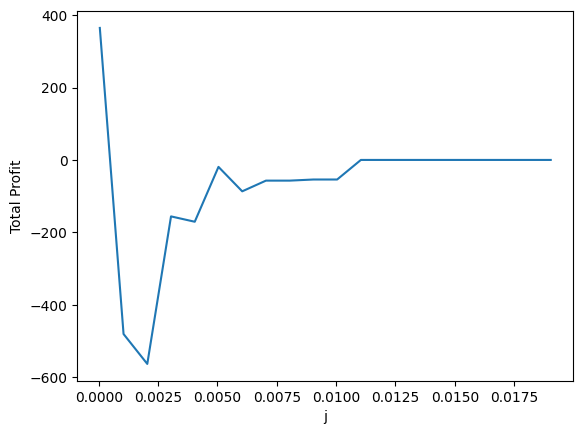

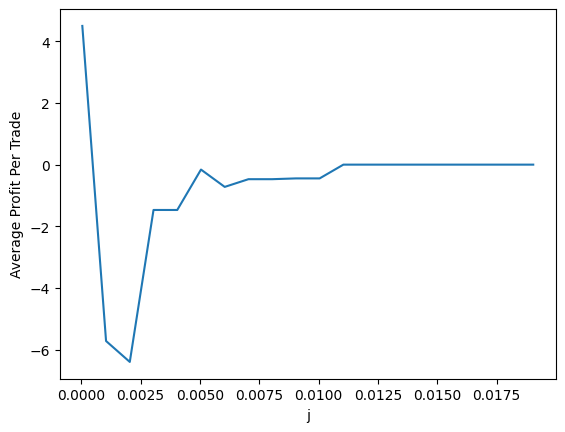

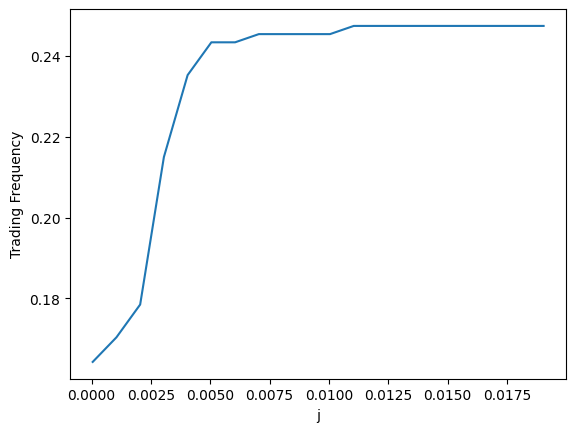

In [744]:
vary_j(ryu_dataframe, xlu_dataframe)

From the above analysis, we see that the changing of j leads to a pattern. That is the mean reversion trading strategy performs best when the j is as close to the mean as possible. This shows that the trade is very symmetric and not biased. An additional benefit of a near-zero j is that the trading frequency is very low. In a real-life scenario this would help in saving transcation costs too.


In [749]:
def vary_g(ryu_dataframe, xlu_dataframe):
    """
    A reasonable estimation of g would be the standard_deviation. 
    Hence, we start out from there.
    """
    
    spread_list= ryu_dataframe['adj_close'].pct_change(1) - xlu_dataframe['adj_close'].pct_change(1)
    g_mean= np.std(spread_list)
    g_list=[]
    for i in range(15):
        g_list.append(g_mean+i*0.001)
   
    
    
    #some reasonable estimates of the other parameters to understand
    M= 1 
    j= 0.000043
    s= 0.05
    
    
    total_profit=[]
    average_profit_per_trade=[]
    trading_frequency=[]
    
    g_dataframe= pd.DataFrame()
    
    for j in g_list:
        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  M, s, plot_statistics=False)
        total_profit.append(tl_profit)
        average_profit_per_trade.append(tl_profit/len(positions_statistics_dataframe))
        trading_frequency.append(len(positions_statistics_dataframe)/len(daily_statistics_dataframe))
        
     
    g_dataframe['g']= g_list
    g_dataframe['Total_Profit']= total_profit
    g_dataframe['Average_Profit_Per_Trade']= average_profit_per_trade
    g_dataframe['Trading_Frequency']= trading_frequency
    
    display(g_dataframe)
    plt.xlabel('g')
    plt.ylabel('Total Profit')
    plt.plot(g_list, g_dataframe['Total_Profit'], label="Total Profit")
    plt.show()
    plt.ylabel('Average Profit Per Trade')
    plt.xlabel('g')
    plt.plot(g_list, g_dataframe['Average_Profit_Per_Trade'], label='Average Profit Per Trade')
    plt.show()
    plt.ylabel('Trading Frequency')
    plt.xlabel('g')
    plt.plot(g_list, g_dataframe['Trading_Frequency'], label='Trading Frequency')
    plt.show()
   

,g,Total_Profit,Average_Profit_Per_Trade,Trading_Frequency
0,0.001986,-730.642117,-8.495839,0.174442
1,0.002986,-103.933359,-0.999359,0.210953
2,0.003986,-215.895434,-1.877352,0.233266
3,0.004986,-9.461164,-0.078843,0.243408
4,0.005986,-86.694672,-0.722456,0.243408
5,0.006986,-57.150574,-0.472319,0.245436
6,0.007986,-57.150574,-0.472319,0.245436
7,0.008986,-54.060574,-0.446782,0.245436
8,0.009986,-54.060574,-0.446782,0.245436
9,0.010986,0.000000,0.000000,0.247465


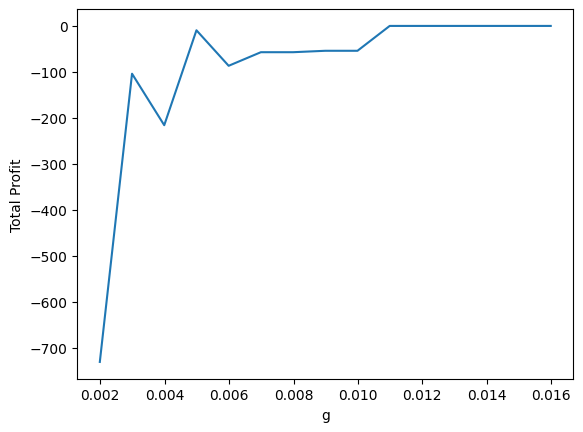

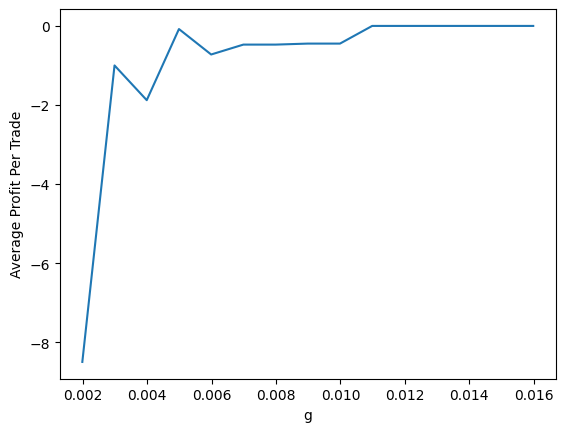

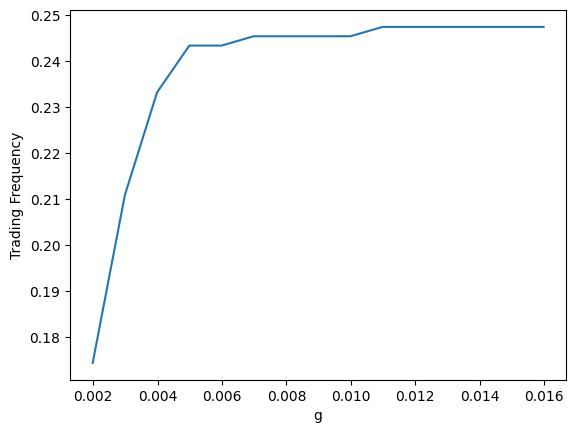

In [750]:
vary_g(ryu_dataframe, xlu_dataframe)

The relationship of g also depicts a trend. We see that there is a huge increase in the profit from 0.002 and 0.004 with a small steady increase in the total costs. It should however be noted that even though there is an increase in the total profits there is an increase in the trading frequency and this relation should be investigated in the case of transaction costs. But in this simpler case, it is safe to say the higher the bounds of g the more profitable the postions.

In [751]:
def vary_s(ryu_dataframe, xlu_dataframe):
   
    s_list=[]
    for i in range(30):
        s_list.append(i*0.001)
    
    
    #some reasonable estimates of the other parameters to understand
    M= 1 
    j= 0.000043
    g= 0.001
    
    
    total_profit=[]
    average_profit_per_trade=[]
    trading_frequency=[]
    
    s_dataframe= pd.DataFrame()
    
    for s in s_list:
        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  M, s, plot_statistics=False)
        total_profit.append(tl_profit)
        average_profit_per_trade.append(tl_profit/len(positions_statistics_dataframe))
        trading_frequency.append(len(positions_statistics_dataframe)/len(daily_statistics_dataframe))
        
     
    s_dataframe['s']= s_list
    s_dataframe['Total_Profit']= total_profit
    s_dataframe['Average_Profit_Per_Trade']= average_profit_per_trade
    s_dataframe['Trading_Frequency']= trading_frequency
    
    display(s_dataframe)
    plt.xlabel('s')
    plt.ylabel('Total Profit')
    plt.plot(s_list, s_dataframe['Total_Profit'], label="Total Profit")
    plt.show()
    plt.ylabel('Average Profit Per Trade')
    plt.xlabel('s')
    plt.plot(s_list, s_dataframe['Average_Profit_Per_Trade'], label='Average Profit Per Trade')
    plt.show()
    plt.ylabel('Trading Frequency')
    plt.xlabel('s')
    plt.plot(s_list, s_dataframe['Trading_Frequency'], label='Trading Frequency')
    plt.show()
    
    

,s,Total_Profit,Average_Profit_Per_Trade,Trading_Frequency
0,0.000,-576.620140,-3.844134,0.304260
1,0.001,-576.620140,-3.844134,0.304260
2,0.002,-770.111918,-5.203459,0.300203
3,0.003,-674.397258,-4.619159,0.296146
4,0.004,-224.046902,-1.545151,0.294118
5,0.005,-224.046902,-1.545151,0.294118
6,0.006,-224.046902,-1.545151,0.294118
7,0.007,-224.046902,-1.545151,0.294118
8,0.008,-217.157911,-1.497641,0.294118
9,0.009,-217.157911,-1.497641,0.294118


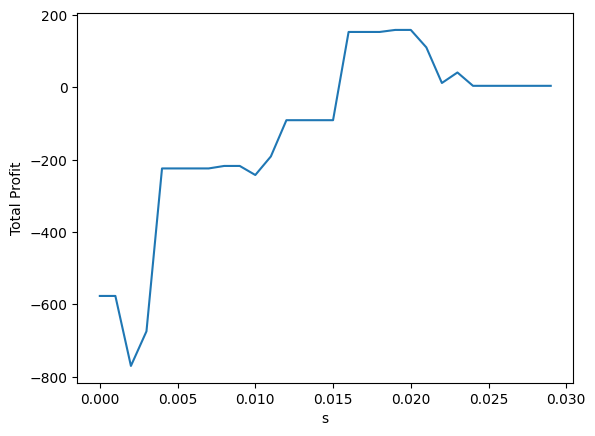

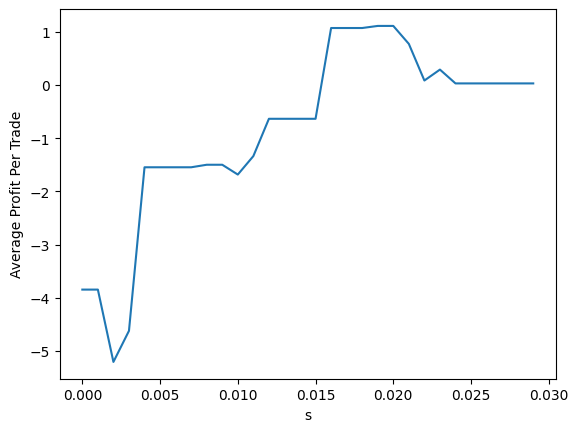

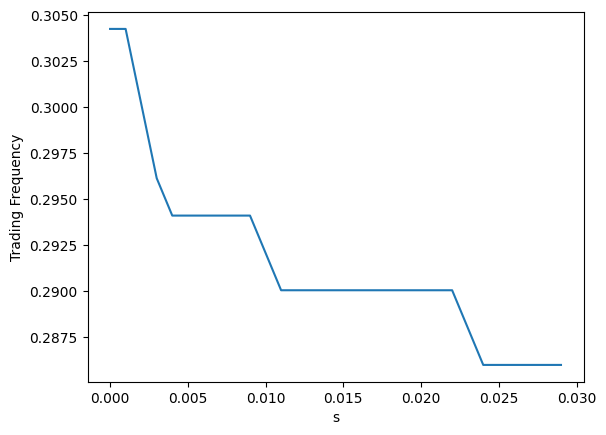

In [752]:
vary_s(ryu_dataframe, xlu_dataframe)

In the most intuitive, if there is any amount of loss we are willing to bear a low s, the trading frequency will be high as seen in this case. The stopping condition increases the profit as s increases, it peaks and then it lowers the total profit. This is in accordance to the blief that a balance between risk is needed. On cannot be so risk-aversive by keeping a low s and not that risk-loving to keep a very high s

In [753]:
def vary_m(ryu_dataframe, xlu_dataframe):
    m_list=[]
    for i in range(1, 10):
        m_list.append(i)
    
    
    #some reasonable estimates of the other parameters to understand
    s= 0.005 
    j= 0.000043
    g= 0.001
    
    
    total_profit=[]
    average_profit_per_trade=[]
    trading_frequency=[]
    
    m_dataframe= pd.DataFrame()
    
    for m in m_list:
        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  m, s, plot_statistics=False)
        total_profit.append(tl_profit)
        average_profit_per_trade.append(tl_profit/len(positions_statistics_dataframe))
        trading_frequency.append(len(positions_statistics_dataframe)/len(daily_statistics_dataframe))
        
     
    m_dataframe['m']= m_list
    m_dataframe['Total_Profit']= total_profit
    m_dataframe['Average_Profit_Per_Trade']= average_profit_per_trade
    m_dataframe['Trading_Frequency']= trading_frequency
    
    display(m_dataframe)
    plt.xlabel('M')
    plt.ylabel('Total Profit')
    plt.plot(m_list, m_dataframe['Total_Profit'], label="Total Profit")
    plt.show()
    plt.ylabel('Average Profit Per Trade')
    plt.xlabel('M')
    plt.plot(m_list, m_dataframe['Average_Profit_Per_Trade'], label='Average Profit Per Trade')
    plt.show()
    plt.ylabel('Trading Frequency')
    plt.xlabel('M')
    plt.plot(m_list, m_dataframe['Trading_Frequency'], label='Trading Frequency')
    plt.show()
  

,m,Total_Profit,Average_Profit_Per_Trade,Trading_Frequency
0,1,-224.046902,-1.545151,0.294118
1,2,-340.565072,-2.660665,0.259635
2,3,687.627376,5.501019,0.253550
3,4,295.154022,2.566557,0.233266
4,5,148.193509,1.384986,0.217039
5,6,-612.071021,-6.182536,0.200811
6,7,-1997.057007,-22.189522,0.182556
7,8,-1800.937074,-22.511713,0.162272
8,9,-1112.539763,-13.244521,0.170385


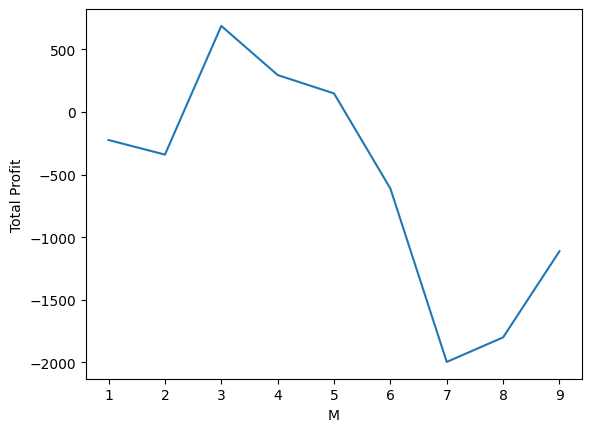

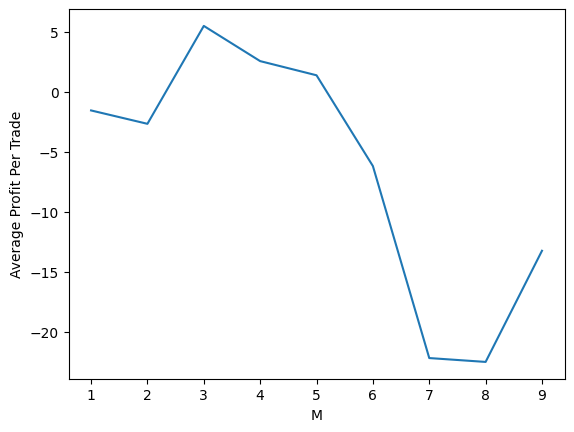

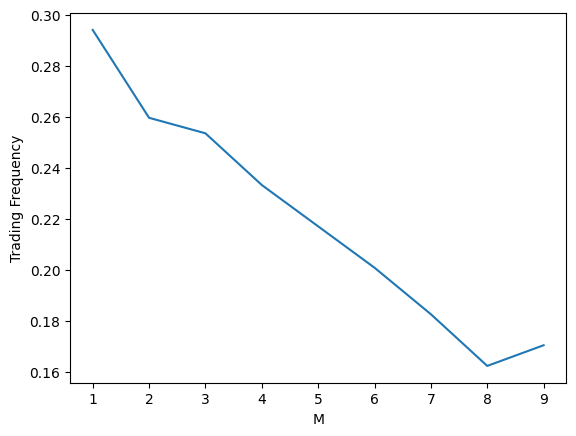

In [754]:
vary_m(ryu_dataframe, xlu_dataframe)

The trading frequency graphs suggests that if M increases then fewer trades are made. This is because over a period of larger days, the returns would be averaged and hence would not follow in our conditon of open a position if spread is greater than g. The volatility of the model, which is the main driver for the trade is lowered and hence fewere trades are made. Again there should be a balance between trades made and we can see as M increase it peaks and then steadily decreases

### Optimizing all the 4 variables at the same time
Optimizing the variable individually helps us get some insight into how each variable individually behaves but may not be the most optimum in terms of optimization, hence we do it all together

In [776]:
 def vary_simulatenously(ryu_dataframe, xlu_dataframe):
        
        spread_list= ryu_dataframe['adj_close'].pct_change(1) - xlu_dataframe['adj_close'].pct_change(1)
        j_mean= np.mean(spread_list)
        g_mean= np.std(spread_list)
        
        m_list=[]
        s_list=[]
        g_list=[]
        j_list=[]
        
        for i in range(1, 6):
            m_list.append(i)
            
        for i in range(1, 6):
            s_list.append(0.002*i)
        
        for j in range(1, 6):
            j_list.append(j_mean+ 0.001*j)
            
        for i in range(1, 6):
            g_list.append(g_mean+ 0.001*i)
            
        
        new_m_list=[]
        new_s_list=[]
        new_g_list=[]
        new_j_list=[]
        
        total_profit=[]
        average_profit_per_trade=[]
        trading_frequency=[]
        
        optimization_dataframe= pd.DataFrame()
        for  m in m_list:
            for s in s_list:
                for g in g_list:
                    for j in j_list:
                        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  m, s, plot_statistics=False)
                        total_profit.append(tl_profit)
                        average_profit_per_trade.append(tl_profit/len(positions_statistics_dataframe))
                        trading_frequency.append(len(positions_statistics_dataframe)/len(daily_statistics_dataframe))
                        new_m_list.append(m)
                        new_s_list.append(s)
                        new_g_list.append(g)
                        new_j_list.append(j)
        
        
        optimization_dataframe['m']= new_m_list
        optimization_dataframe['s']= new_s_list
        optimization_dataframe['g']= new_g_list
        optimization_dataframe['j']= new_j_list
        optimization_dataframe['Total_Profit']= total_profit
        optimization_dataframe['Average_Profit_Per_Trade']= average_profit_per_trade
        optimization_dataframe['Trading_Frequency']= trading_frequency
        optimization_dataframe= optimization_dataframe.sort_values(['Total_Profit', 'Trading_Frequency'], ascending=[False, True])
        display(optimization_dataframe.head(15))   
        #a standard normal plot and a normal plot
        plt.rcParams["figure.figsize"] = [7.00, 3.50]
        plt.rcParams["figure.autolayout"] = True
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        img = ax.scatter(optimization_dataframe['m'], optimization_dataframe['s'], optimization_dataframe['g'], c=optimization_dataframe['Total_Profit'], cmap='YlOrRd', alpha=1)
        plt.xlabel('M')
        plt.ylabel('s')
        #plt.zlabel('g')
        fig.colorbar(img)
        #colorbar.set_label('Total Profit')
        plt.show()
        return optimization_dataframe
        

,m,s,g,j,Total_Profit,Average_Profit_Per_Trade,Trading_Frequency
275,3,0.004,0.002986,0.001043,1366.776375,16.668005,0.166329
250,3,0.002,0.002986,0.001043,1364.018978,16.634378,0.166329
325,3,0.008,0.002986,0.001043,1087.475395,13.765511,0.160243
276,3,0.004,0.002986,0.002043,1083.344901,12.896963,0.170385
251,3,0.002,0.002986,0.002043,1080.587504,12.864137,0.170385
255,3,0.002,0.003986,0.001043,1062.914657,19.325721,0.111562
350,3,0.010,0.002986,0.001043,1058.497086,13.746715,0.156187
300,3,0.006,0.002986,0.001043,1057.438057,13.217976,0.162272
280,3,0.004,0.003986,0.001043,1052.870515,19.143100,0.111562
335,3,0.008,0.004986,0.001043,1015.777370,29.022211,0.070994


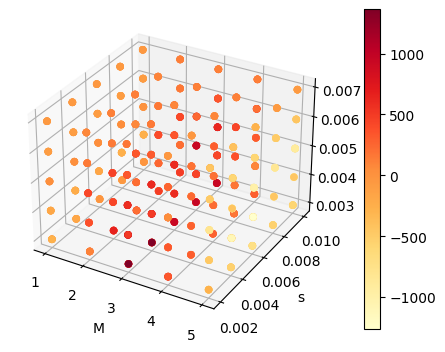

In [777]:
_= vary_simulatenously(ryu_dataframe, xlu_dataframe)

Here we explore the 3D-graphs to see the impact of the parameters on the total_realized_pnl. The x-axis is M, the y-axis is s and the z-axis is g and the colour bar is the total_reliazed pnl. Unfortunately, it was not possible to have a 5d-plot hence j was omitted because from the initial analysis the j value seemed very clear.

### Best Values after hyper-paramater optimization

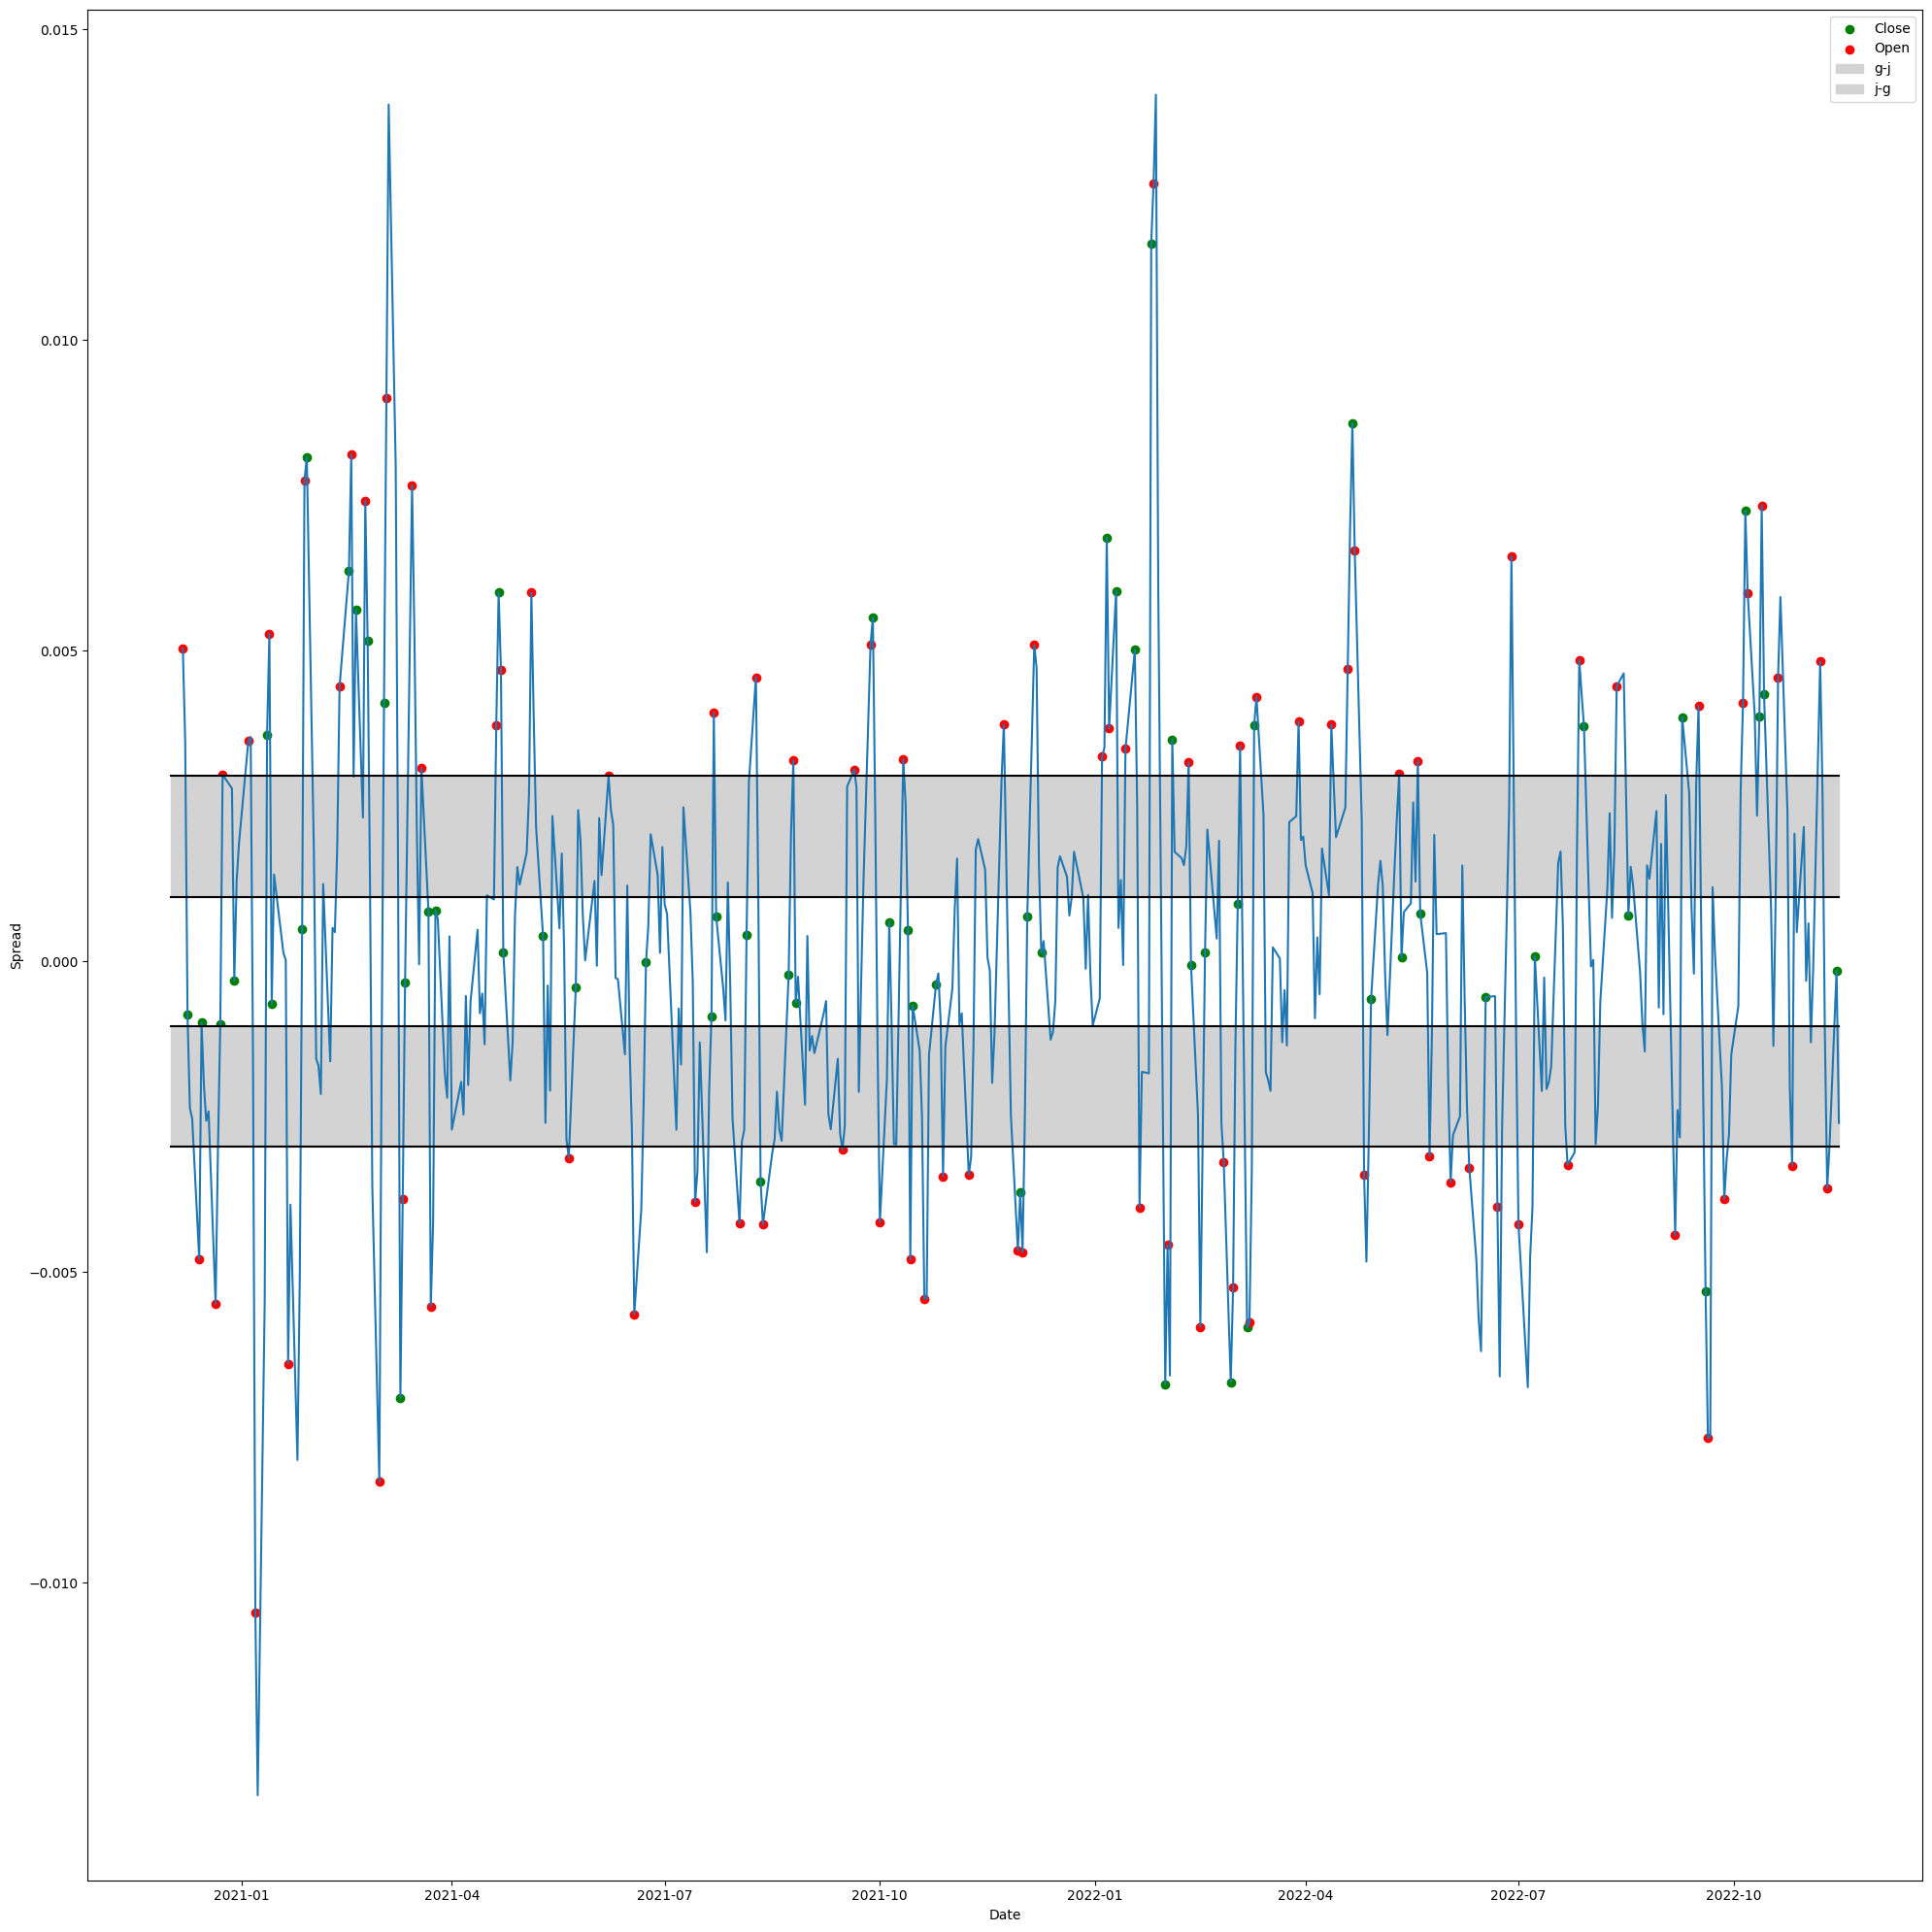

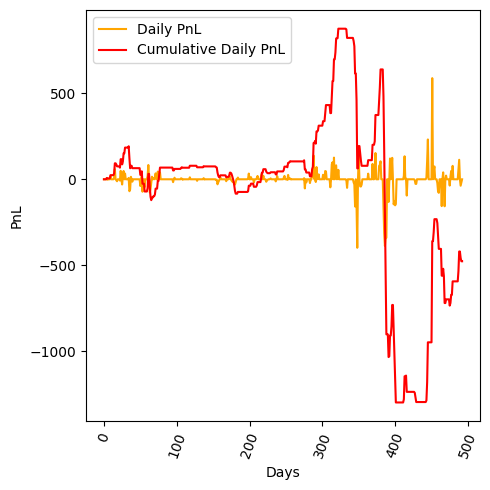

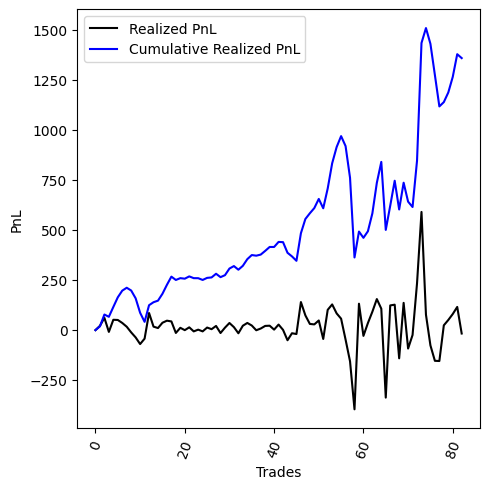

Total Realized PnL:  1357.9389758164439
Total Return on Capital:  9.085716839094e-05


,Pnl_x,Pnl_y,Daily_Pnl,Spread_List
0,0.000000,0.000000,0.000000,NaN
1,0.000000,0.000000,0.000000,NaN
2,0.000000,0.000000,0.000000,NaN
3,-0.000000,0.000000,0.000000,0.005034
4,37.297118,-29.700933,7.596185,0.003550


,Profit,Open Position Date,Close Position Date,Stocks_Held
0,-2.447957,2020-12-07,2020-12-09,"[-102, 166]"
1,18.836242,2020-12-14,2020-12-15,"[154, -249]"
2,59.118683,2020-12-21,2020-12-23,"[155, -250]"
3,-11.420006,2020-12-24,2020-12-29,"[-154, 249]"
4,49.214454,2021-01-04,2021-01-06,"[-140, 227]"


In [779]:
#best parameters
m=3
s=0.004
g= 0.002986
j= 0.001043

total_profit,positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  m, s, plot_statistics=True)

In [774]:
def correlation_to_ff3(ryu_dataframe, xlu_dataframe, fff_data):
    m=3
    s=0.08
    g= 0.004986
    j= 0.001043
    tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  m, s, plot_statistics=False)
   
    model = sm.OLS(list(daily_statistics_dataframe['Daily_Pnl']), fff_data).fit()
    print(model.summary())
    
    new_df= pd.DataFrame()
    new_df['Daily_Pnl']= daily_statistics_dataframe['Daily_Pnl']
    new_df['Mkt-RF']= fff_data['Mkt-RF']
    new_df['SMB']= fff_data['SMB']
    new_df['HML']= fff_data['HML']
    new_df['RF']= fff_data['RF']
    fff_data['total']= list(daily_statistics_dataframe['Daily_Pnl'])
    corr_matrix =fff_data.corr()
    display(corr_matrix)
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.942e+34
Date:                Thu, 19 Jan 2023   Prob (F-statistic):                        0.00
Time:                        21:50:17   Log-Likelihood:                          15830.
No. Observations:                 493   AIC:                                 -3.165e+04
Df Residuals:                     488   BIC:                                 -3.163e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,Mkt-RF,SMB,HML,RF,total
Mkt-RF,1.000000,0.344680,-0.417590,-0.000834,0.027613
SMB,0.344680,1.000000,-0.253564,0.010299,0.021146
HML,-0.417590,-0.253564,1.000000,-0.011719,0.021155
RF,-0.000834,0.010299,-0.011719,1.000000,-0.107846
total,0.027613,0.021146,0.021155,-0.107846,1.000000


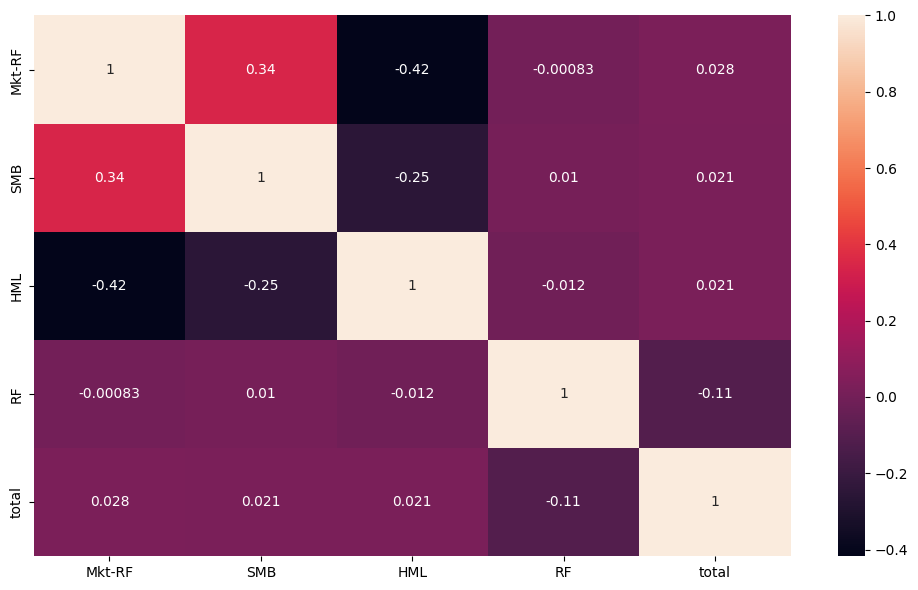

In [775]:
correlation_to_ff3(ryu_dataframe, xlu_dataframe, fff_data)

Correlation between the Fama French Model:
From here we realize that the it is a good thing that the daily pnl is not correlated to the market factors. Because if they were it would just be easier to invest in the market itself. 
As mentioned in the discussion, Fama-French factors typically do a good job of explaining asset/strategy returns, so it is good idea to compare performance of the strategy with the FF factors. Intuitions tells us that the spread trading strategy is market neutral and you can verify this by comparing it with the market factor and check to see if shows insignificant correlation.
The regression and the correlation tells us that the the tarding strategy is not related to the FF factors

### Other Metrics of Testing
1. Kurtosis
2. Skewness

In [781]:
print("Kurtosis: ", positions_statistics_dataframe.kurtosis())

Kurtosis:  Profit    10.805229
dtype: float64


Kurtosis: Data sets with low kurtosis tend to have light tails, or lack of outliers.
Hence, the data from profits have a lot of outliers which means the trades make huge losses and profits 

In [783]:
print("Skewness: ", positions_statistics_dataframe.skew())

Skewness:  Profit    0.652846
dtype: float64


Skewness tells us the direction of outliers. In a positive skew, the tail of a distribution curve is longer on the right side.
However, this skew value is small and a lot of analysis is not possible

### Test to check if the spread is biased or unsymmetric.
That is traditionally we use the bands j to g and -j to -g for analysis. However, would it be better if we used bands such as j+constant to g or -j to -g-constant or -j-constant to g or j to g +constant for better results.

In [791]:
def symmetricity_j(ryu_dataframe, xlu_dataframe):
    symmetricity_list= []
    total_profit=[]
    average_profit_per_trade=[]
    trading_frequency=[]
    max_counter=0
    max_i=-1
    
    
        
    for i in range(10):
        symmetricity_list.append(0.0001*i)
        
    for i in symmetricity_list:
        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  m, s, plot_statistics=False, j_upper=i)
        total_profit.append(tl_profit)
        if tl_profit> max_counter:
            max_i= i
    print('Max i:', max_i)
     
    max_counter=0
    max_i=-1
    for i in symmetricity_list:
        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  m, s, plot_statistics=False, j_lower=i)
        total_profit.append(tl_profit)
        if tl_profit> max_counter:
            max_i= i
    print('Max i:', max_i)
     
    max_counter=0
    max_i=-1
    for i in symmetricity_list:
        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  m, s, plot_statistics=False, g_upper=i)
        total_profit.append(tl_profit)
        if tl_profit> max_counter:
            max_i= i
    print('Max i:', max_i)
    
    max_counter=0
    max_i=-1
    for i in symmetricity_list:
        tl_profit, positions_statistics_dataframe, daily_statistics_dataframe= spread_reversion_trading_strategy(ryu_dataframe, xlu_dataframe, j, g,  m, s, plot_statistics=False, g_lower=i)
        total_profit.append(tl_profit)
        if tl_profit> max_counter:
            max_i= i
    print('Max i:', max_i)
     
    print('Mean: ',  np.mean(total_profit))
    print('STD: ', np.std(total_profit))
    print('Max', max(total_profit))
    

In [792]:
symmetricity_j(ryu_dataframe, xlu_dataframe)

Max i: 0.0009000000000000001
Max i: 0.0009000000000000001
Max i: 0.0009000000000000001
Max i: 0.0009000000000000001
Mean:  1186.614891701532
STD:  146.04097014433606
Max 1357.9389758164439


Here we see tha the data is unbiased and symmetric from both sides of j and both sides of g because the i in all four cases is very close to 0. 

## Analysis of the Strategy

### Macroeconomic Prespective of the Strategy
This strategy as seen from here tends to make more money when the market is volatile and less money otherwise. This strategy tends to make money when the asset prices take extreme changes which this strategy can capitilize on. The mean reversion strategy is completely different form the momentum or trend following strategies.

### Improvements
The mean reversion strategy should only be used if there is a strong trend present. If there is no strong current present then the strategy would likely bring losses. The terms tend to be short term hence less time you are in the markets, the more you are immune to price shocks, so being in these trades short term could be another way to improve the strategy, again there is loss of less returns if we exit too quickly and hence a sweet spot of balance should be obtained. 
Because we can tune the parameters j, g we can ensure we have a low drawdown which could be another way to improve the strategy

### Drawbacks
The drawbacks of this method are that the reversion to the mean is not guaranteed as it could indiciate a norm.
Another drawback of this strategy is that the strategy does not let the profits run. It cuts the wineers short and lets the losers run due to the j condition.
Another critical point about mean-reversion is high trading frequenct. To get a high total_realized_pnl you need to trade quite frequently. The drawback is slippage and commissions.

### Conclusion
This strategy after optimisation did make it total_realized_pnl of around 1300 but this is however an ideal case scenario where we no the day-end prices of the day and there are no transcation costs. When both these assumptions are no longer held valid as in the case of a real-world scenario this strategy would not perform as well. It is a strategy that should be employed if we predict the ETF prices to take extreme positions.
